## Example Code for Interval K-means

In [1]:
from interClusLib.IntervalData import IntervalData
from interClusLib.preprocessing import min_max_normalize
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization import Interval3d, IntervalParallelCoordinates
from interClusLib.evaluation import *
from interClusLib.cluster_number_analysis import *

In [2]:
clustered_data = IntervalData.make_interval_blobs(n_clusters=3, n_dims=3, n_samples= 200)

clustered_data.summary()

Data Summary:
       Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
count       200.000000       200.000000       200.000000       200.000000   
mean          1.870301         4.987301        -1.095170         0.384248   
std           4.237015         4.283972         5.199785         5.156868   
min          -4.969626        -1.303534       -10.663684        -9.852828   
25%          -1.299150         1.441355        -7.320919        -5.899033   
50%          -0.103773         3.311103         0.976237         3.023886   
75%           6.709971         9.818193         3.032175         4.256320   
max           9.271834        12.994301         5.734041         7.036051   

       Feature_3_lower  Feature_3_upper  
count       200.000000       200.000000  
mean         -1.234743         1.475962  
std           5.196742         5.864897  
min         -10.468047        -8.498512  
25%          -7.432418        -5.671791  
50%           0.767861         4.201146 

In [3]:
data = clustered_data.get_intervals()

data = min_max_normalize(data)

In [4]:
kmeans = IntervalKMeans(n_clusters=3, max_iter=1000, distance_func='euclidean', random_state=43)

kmeans.fit(data)

In [5]:
print(kmeans.centroids_)
print(kmeans.get_labels())

[[[0.1797754  0.32574294]
  [0.14174551 0.22169906]
  [0.52219806 0.68629323]]

 [[0.2634914  0.46539457]
  [0.81496969 0.85628634]
  [0.10806442 0.18707539]]

 [[0.69601052 0.86827175]
  [0.65913805 0.78856615]
  [0.6662271  0.80390418]]]
[2 0 2 1 2 2 1 0 2 2 2 0 1 1 0 1 1 2 2 2 1 2 1 2 1 1 1 2 2 1 2 1 0 2 1 0 1
 1 0 0 1 1 0 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 2 1 0 1 2 2 1 0 2 2 0 0 1 0 0 0
 0 1 0 2 0 1 1 2 0 0 1 0 1 0 0 1 0 0 1 2 0 2 2 1 2 2 1 0 1 1 1 0 1 1 2 2 0
 2 0 2 2 2 0 0 0 0 1 0 0 2 0 2 0 0 0 0 1 1 0 2 0 2 0 1 0 1 1 2 0 2 0 1 2 0
 2 2 2 2 0 0 2 0 1 0 0 1 2 2 0 1 1 1 0 0 2 0 0 2 2 0 1 2 2 1 0 2 1 2 0 1 0
 2 1 1 1 0 1 0 2 1 1 1 1 2 0 1]


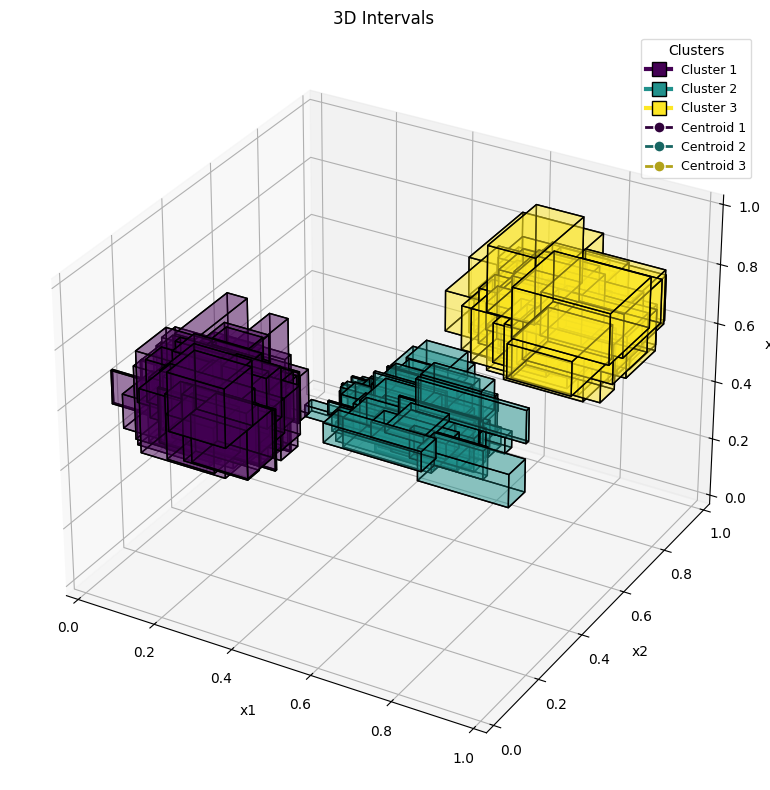

In [6]:
fig, ax = Interval3d.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, margin=0.01)

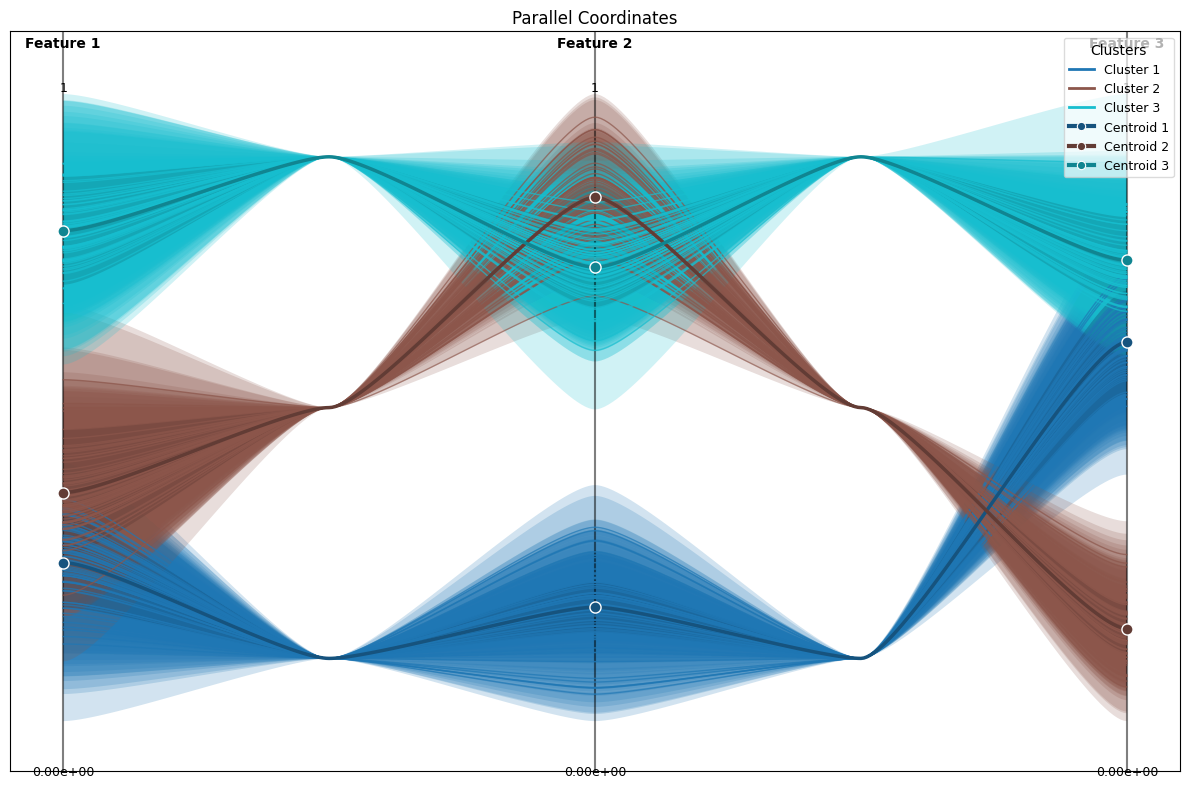

In [7]:
fig, ax = IntervalParallelCoordinates.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, beta= 1)

In [8]:
metric_results = kmeans.compute_metrics_for_k_range(
    data,
    min_clusters=2,
    max_clusters=10,
    metrics=['distortion', 'silhouette', 'davies_bouldin','calinski_harabasz','dunn'],
)

print(metric_results)

{'distortion': {2: 0.1999931643896569, 3: 0.02072198804983093, 4: 0.019129206693292277, 5: 0.01761554168134157, 6: 0.016108079028644147, 7: 0.015313657430973925, 8: 0.014701293824975047, 9: 0.01408362663589292, 10: 0.013391578835404937}, 'silhouette': {2: 0.5706850393146836, 3: 0.8156791610290228, 4: 0.6093696144273676, 5: 0.40564399586086297, 6: 0.2009836822783294, 7: 0.19067583949351835, 8: 0.16772562143784525, 9: 0.16056358104314633, 10: 0.15303149962809198}, 'davies_bouldin': {2: 0.6795288946508692, 3: 0.25609443013589367, 4: 1.007488835234765, 5: 1.4808668407596417, 6: 1.7280974310802708, 7: 1.6697979875080675, 8: 1.6963665806988328, 9: 1.7513768639429144, 10: 1.682933054213311}, 'calinski_harabasz': {2: 213.6950968582843, 3: 1878.1531465821326, 4: 1354.9124658600015, 5: 1102.0617148891643, 6: 962.8445457021345, 7: 841.312975558318, 8: 748.4134308779435, 9: 681.0688622676225, 10: 634.4375968120603}, 'dunn': {2: 0.5429020998264926, 3: 1.361945646501724, 4: 0.15551698317851267, 5: 0

L Method optimal k: 3
Elbow Method optimal k: 3


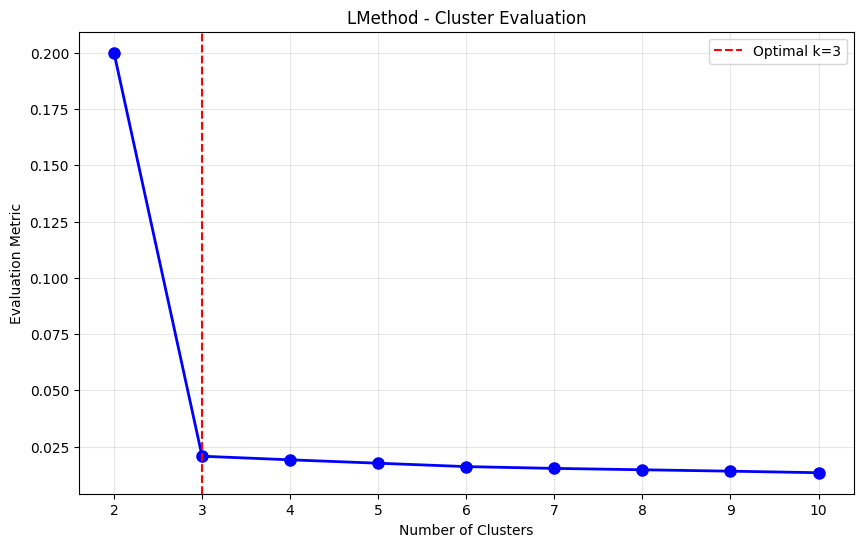

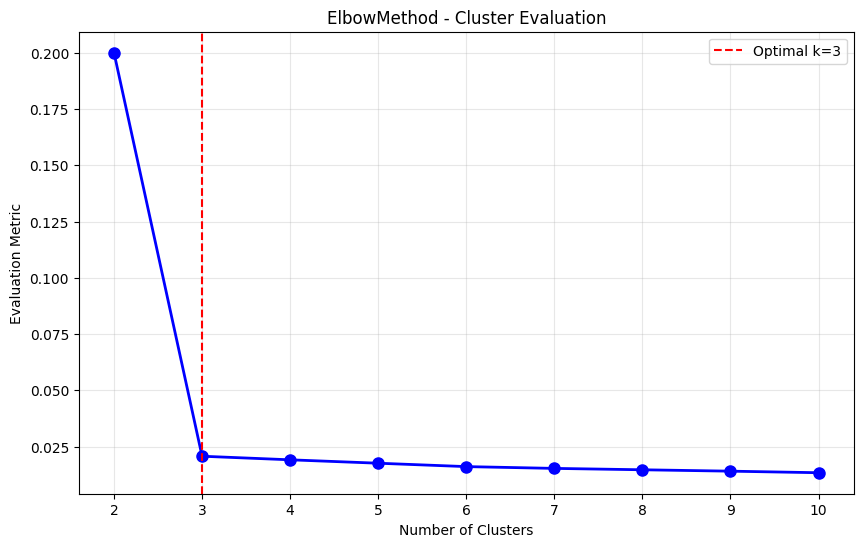

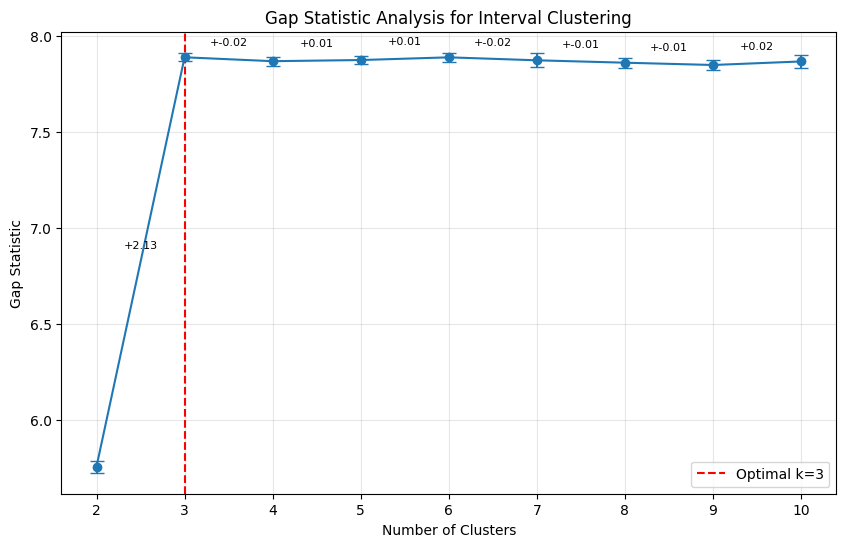

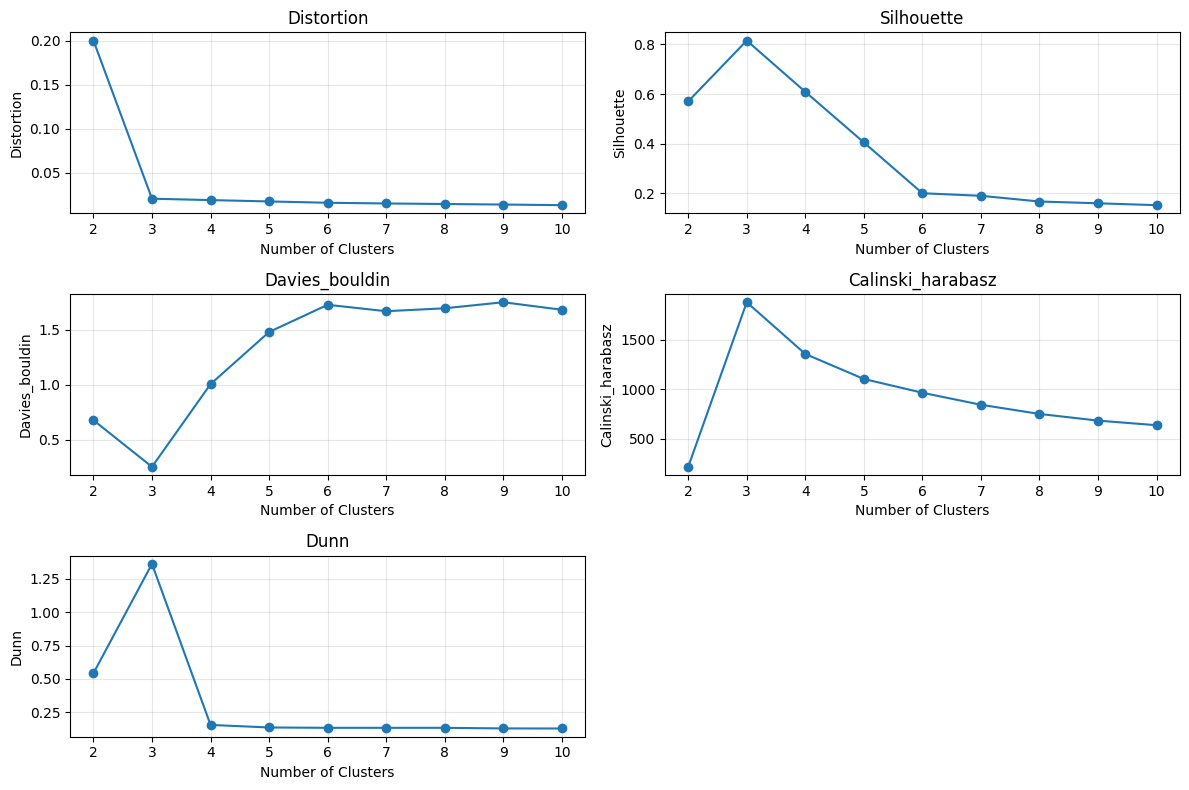

In [9]:
# 使用L方法确定最佳聚类数
l_method = LMethod(min_clusters=2, max_clusters=10)
optimal_k_l = l_method.evaluate(metric_results['distortion'])
plt = l_method.plot()
print(f"L Method optimal k: {optimal_k_l}")

# 使用肘部法则确定最佳聚类数
elbow = ElbowMethod(min_clusters=2, max_clusters=10, second_derivative= True)
optimal_k_elbow = elbow.evaluate(metric_results['distortion'])
print(f"Elbow Method optimal k: {optimal_k_elbow}")
plt = elbow.plot()

def cluster(intervals, k):
    return kmeans.cluster_and_return(intervals, k)

# 初始化 GapStatistic
gap_evaluator = GapStatistic(min_clusters=2, max_clusters=15, n_refs=10)

# 使用 GapStatistic 确定最佳聚类数
optimal_k = gap_evaluator.evaluate(
    eval_data=metric_results['distortion'],
    raw_data=data,
    cluster_func=cluster
)

# 可视化结果
gap_evaluator.plot_gap()
plt.title("Gap Statistic Analysis for Interval Clustering")
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, (metric_name, values) in enumerate(metric_results.items(), 1):
    plt.subplot(3, 2, i)
    x = list(values.keys())
    y = list(values.values())
    plt.plot(x, y, 'o-')
    plt.title(f"{metric_name.capitalize()}")
    plt.xlabel("Number of Clusters")
    plt.ylabel(metric_name.capitalize())
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()